In [1]:
# Imports
import os
import glob
import pickle
from collections import OrderedDict
import pandas as pd
import numpy as np
from sys import platform as sys_pf
import matplotlib
if sys_pf == 'darwin':
    matplotlib.use("TkAgg") # This fixes crashes on mac
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit
# sci-kit image
from skimage import exposure
from skimage.color import rgb2gray
from skimage.filters.rank import median
from skimage.morphology import disk
from skimage.measure import profile_line
# GUI imports
import os
import csv
import time
import datetime
# Plotting specifics
# UI
from matplotlib.figure import Figure
# Scalebar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
# Misc.
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.widgets import SpanSelector
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
from matplotlib.patches import Rectangle
# Colors
from palettable.tableau import Tableau_10, Tableau_20
from palettable.colorbrewer.qualitative import Set1_9
matplotlib.rc("savefig",dpi=100)

In [5]:
frames_path = os.path.abspath('C:\\Users\\holmesgroup\\Desktop\\User Data\\Jack\\190110_TPBi\\Frames\\')
analysis_path = os.path.join(frames_path,'analysis_results')

In [40]:
ref_data = np.genfromtxt(os.path.join(analysis_path,'reference_points_vs_time.csv'),delimiter=',',skip_header=1)
time,x,y = ref_data[:,0],ref_data[:,2],ref_data[:,3]
x=x.astype('int')
y=y.astype('int')
dx = x-x[0]
dy = y-y[0]
#plt.plot(time,dx)
#plt.plot(time,dy)
#plt.show()

In [12]:
time_files = glob.glob(os.path.join(frames_path,'*.png'))

C:\Users\holmesgroup\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


<IPython.core.display.Javascript object>


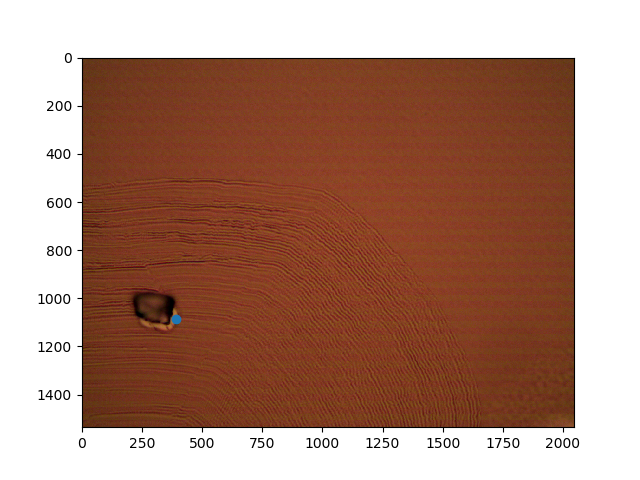

In [43]:
frame_index=0
img=misc.imread(time_files[frame_index])
image_fig,image_ax = plt.subplots()
x1,x2,y1,y2 = 1000,1500,500,1000
cropData = image_ax.imshow(img)
plt.plot(x[0],y[0],'o')

C:\Users\holmesgroup\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


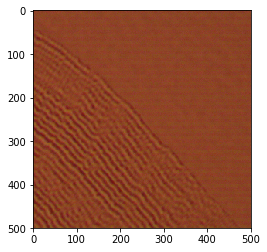

In [15]:
frame_index=0
img=misc.imread(time_files[frame_index])
image_fig,image_ax = plt.subplots()
x1,x2,y1,y2 = 1000,1500,500,1000
cropData = image_ax.imshow(img[y1:y2,x1:x2])

In [23]:
%matplotlib notebook

C:\Users\holmesgroup\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


<IPython.core.display.Javascript object>


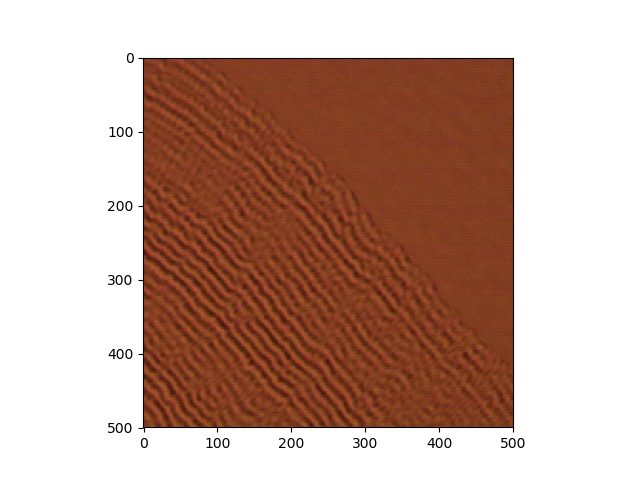

In [44]:
frame_index=10
img=misc.imread(time_files[frame_index])
image_fig,image_ax = plt.subplots()
x1,x2,y1,y2 = 1000,1500,500,1000
cropData = image_ax.imshow(img[y1:y2,x1:x2])

In [54]:
a=np.array([1,2,3,4,5])
a[0:1]

array([1])

In [51]:
import imageio

In [ ]:
line, = self.image_ax[0].plot([], [], '-or')
# Draw lines on image
line.set_data(self.linebuilder.xs, self.linebuilder.ys)

In [46]:
import time
for frame_index in range(0,100):
    img=misc.imread(time_files[frame_index])
    cropData.set_data(img[(y1+dy[frame_index]):(y2+dy[frame_index]),
                          (x1+dx[frame_index]):(x2+dx[frame_index])])
    image_fig.canvas.draw()
    time.sleep(0.1)

C:\Users\holmesgroup\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
import time
for frame_index in range(0,100):
    img=misc.imread(time_files[frame_index])
    cropData.set_data(img[y1:y2,x1:x2])
    image_fig.canvas.draw()
    time.sleep(0.1)

C:\Users\holmesgroup\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
self.extract_times_and_sort() # saves self.times and self.sort_indices
sort_idx = self.sort_indices[self.current_frame_index]
timeFile = self.time_files[sort_idx]
self.t0 = self.times[sort_idx]
self.sorted_times = np.array(self.times)[self.sort_indices]-self.t0